In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.preprocessing import LabelEncoder  
warnings.filterwarnings('ignore')
%matplotlib inline

In [76]:
df = pd.read_csv('adult.csv')

In [77]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num',
       'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Capital-loss', 'hours-per-week', 'Native-country',
       'Salary'],
      dtype='object')

In [78]:
df.columns = df.columns.str.strip()

### Understanding the Dependent Variable

In [83]:
df['Salary'].describe()

count      32561
unique         2
top        <=50K
freq       24720
Name: Salary, dtype: object

In [84]:
df['Salary'].head(20)

0      <=50K
1      <=50K
2      <=50K
3      <=50K
4      <=50K
5      <=50K
6      <=50K
7       >50K
8       >50K
9       >50K
10      >50K
11      >50K
12     <=50K
13     <=50K
14      >50K
15     <=50K
16     <=50K
17     <=50K
18     <=50K
19      >50K
Name: Salary, dtype: object

In [85]:
#Converting the 2 string outcome to integer
le = LabelEncoder()
df['Salary'] = le.fit_transform(df['Salary'])

<AxesSubplot:xlabel='Salary', ylabel='count'>

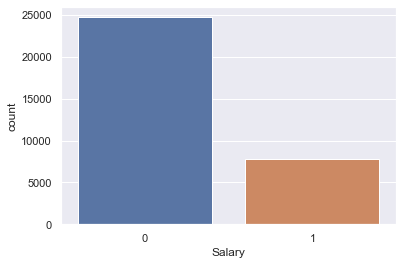

In [86]:
sns.set_theme(style="darkgrid")
sns.countplot(df['Salary'])

We can use different methods to deal with imbalanced data. 
https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/

In this experiment, we will be using downsampling as the method to deal with imbalanced data.

In [87]:
from sklearn.utils import resample

salaryNeg = df[df["Salary"] == 0]
salaryPlus = df[df["Salary"] == 1]


salaryNeg_downsample = resample(salaryNeg,
             replace=True,
             n_samples=len(salaryPlus),
             random_state=42)

df_downsampled = pd.concat([salaryNeg_downsample, salaryPlus])


<AxesSubplot:xlabel='Salary', ylabel='count'>

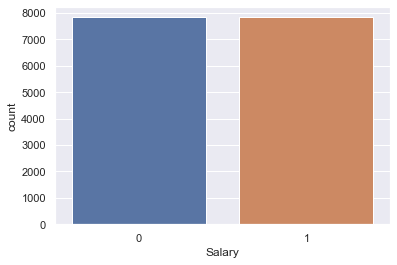

In [90]:
sns.countplot(df_downsampled['Salary'])

In [91]:
df_downsampled.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education-num      int64
Marital-status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-gain       int64
Capital-loss       int64
hours-per-week     int64
Native-country    object
Salary             int64
dtype: object

In [92]:
df_downsampled.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,hours-per-week,Native-country,Salary
31119,28,Private,273269,Some-college,10,Never-married,Craft-repair,Not-in-family,Black,Male,0,0,40,United-States,0
20745,18,Local-gov,159032,7th-8th,4,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0
1127,63,Federal-gov,124244,HS-grad,9,Widowed,Handlers-cleaners,Not-in-family,Black,Male,0,0,40,United-States,0
7101,37,Private,120045,HS-grad,9,Divorced,Machine-op-inspct,Not-in-family,White,Female,0,0,56,United-States,0
28380,40,Private,72791,Some-college,10,Never-married,Craft-repair,Own-child,Black,Male,0,0,40,United-States,0


### Understanding the Relationship with Other Features

https://seaborn.pydata.org/tutorial/categorical.html